In [34]:
import  numpy as np
import pickle as pkl
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [2]:
f = open("Sherlock Holmes.txt" , '+r')
txt_data =  f.read()

In [3]:
tokenizer = Tokenizer()

In [4]:
tokenizer.fit_on_texts([txt_data])

In [5]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'i',
 4: 'of',
 5: 'to',
 6: 'a',
 7: 'in',
 8: 'it',
 9: 'that',
 10: 'he',
 11: 'was',
 12: 'you',
 13: 'his',
 14: 'is',
 15: 'as',
 16: 'have',
 17: 'with',
 18: 'my',
 19: 'had',
 20: 'at',
 21: 'which',
 22: 'for',
 23: 'not',
 24: 'but',
 25: 'be',
 26: 'me',
 27: 'from',
 28: 'holmes',
 29: 'upon',
 30: 'said',
 31: 'we',
 32: 'him',
 33: 'there',
 34: 'this',
 35: 'so',
 36: 'on',
 37: 'your',
 38: 'what',
 39: 'all',
 40: 'very',
 41: 'she',
 42: 'would',
 43: 'then',
 44: 'were',
 45: 'mr',
 46: 'an',
 47: 'one',
 48: 'when',
 49: 'no',
 50: "'",
 51: 'her',
 52: 'by',
 53: 'been',
 54: 'do',
 55: 'are',
 56: 'man',
 57: 'out',
 58: 'up',
 59: 'could',
 60: 'will',
 61: 'some',
 62: 'if',
 63: 'who',
 64: 'or',
 65: 'little',
 66: 'down',
 67: 'has',
 68: 'they',
 69: 'see',
 70: 'into',
 71: 'us',
 72: 'may',
 73: 'am',
 74: 'come',
 75: 'well',
 76: 'now',
 77: 'know',
 78: 'did',
 79: 'over',
 80: 'must',
 81: 'more',
 82: 'about',
 83: 'our',
 8

In [6]:
input_sequences = []
for scentence in txt_data.split('\n'):
    tokenize_scentence = tokenizer.texts_to_sequences([scentence])[0]
    
    for i in range(1 , len(tokenize_scentence)):
        input_sequences.append(tokenize_scentence[:i+1])

In [7]:
input_sequences

[[1, 1266],
 [1, 1266, 4],
 [1, 1266, 4, 105],
 [1, 1266, 4, 105, 28],
 [2545, 2546],
 [2545, 2546, 2547],
 [252, 4],
 [252, 4, 1267],
 [6, 633],
 [6, 633, 7],
 [6, 633, 7, 433],
 [1, 137],
 [1, 137, 230],
 [1, 137, 230, 290],
 [6, 97],
 [6, 97, 4],
 [6, 97, 4, 1268],
 [1, 306],
 [1, 306, 634],
 [1, 306, 634, 388],
 [1, 237],
 [1, 237, 465],
 [1, 237, 465, 389],
 [1, 56],
 [1, 56, 17],
 [1, 56, 17, 1],
 [1, 56, 17, 1, 1677],
 [1, 56, 17, 1, 1677, 991],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 635],
 [1, 506, 4, 1, 635, 2548],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 2549],
 [1, 506, 4, 1, 2549, 2550],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 2551],
 [1, 506, 4, 1, 2551, 1269],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 992],
 [1, 506, 4, 1, 992, 1270],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 1678],
 [1, 506, 4, 1, 1678, 2552],
 [1, 506],
 [1, 506, 4],
 [1, 506, 4, 1],
 [1, 506, 4, 1, 1679],
 [1, 506, 4,

In [8]:
max_len = max([len(x) for x in input_sequences])
max_len

17

In [9]:
padded_input_sequences = pad_sequences(input_sequences , maxlen= max_len , padding='pre')
padded_input_sequences

array([[   0,    0,    0, ...,    0,    1, 1266],
       [   0,    0,    0, ...,    1, 1266,    4],
       [   0,    0,    0, ..., 1266,    4,  105],
       ...,
       [   0,    0,    0, ...,  821, 1940,   70],
       [   0,    0,    0, ..., 1940,   70,    1],
       [   0,    0,    0, ...,   70,    1,  254]], dtype=int32)

In [10]:
x_input = padded_input_sequences[:, : - 1]
x_input

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1, 1266],
       [   0,    0,    0, ...,    1, 1266,    4],
       ...,
       [   0,    0,    0, ...,   13,  821, 1940],
       [   0,    0,    0, ...,  821, 1940,   70],
       [   0,    0,    0, ..., 1940,   70,    1]], dtype=int32)

In [11]:
y_input = padded_input_sequences[:,- 1]
y_input

array([1266,    4,  105, ...,   70,    1,  254], dtype=int32)

In [12]:
y_input = to_categorical(y_input , num_classes=len(tokenizer.index_word)+1)
y_input

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1 , 100 , input_length = max_len-1 ))
model.add(LSTM(250))
model.add(Dense(len(tokenizer.index_word)+1 , activation = 'softmax'))

2024-03-29 14:39:44.015740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 14:39:44.371263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 14:39:44.371632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 14:39:44.374342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 14:39:44.374950: I tensorflow/compile

In [14]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 16, 100)           525200    
                                                                 
 lstm (LSTM)                 (None, 250)               351000    
                                                                 
 dense (Dense)               (None, 5252)              1318252   
                                                                 
Total params: 2194452 (8.37 MB)
Trainable params: 2194452 (8.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(x_input,y_input , epochs=100)

2024-03-29 14:40:23.421447: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 825257264 exceeds 10% of free system memory.
2024-03-29 14:40:24.217228: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 825257264 exceeds 10% of free system memory.


Epoch 1/100
  77/1228 [>.............................] - ETA: 15s - loss: 5.7343 - accuracy: 0.0954

2024-03-29 14:40:25.613323: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 619/1228 [==============>...............] - ETA: 7s - loss: 5.7406 - accuracy: 0.0944

2024-03-29 14:40:32.292488: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 971/1228 [======================>.......] - ETA: 3s - loss: 5.7073 - accuracy: 0.0965

2024-03-29 14:40:36.613850: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 15s 12ms/step - loss: 5.7021 - accuracy: 0.0975
Epoch 2/100
  11/1228 [..............................] - ETA: 13s - loss: 5.3332 - accuracy: 0.1165

2024-03-29 14:40:39.900895: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 104/1228 [=>............................] - ETA: 14s - loss: 5.3592 - accuracy: 0.1181

2024-03-29 14:40:41.113583: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 603/1228 [=============>................] - ETA: 7s - loss: 5.3255 - accuracy: 0.1195

2024-03-29 14:40:47.308335: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1003/1228 [=======================>......] - ETA: 2s - loss: 5.3212 - accuracy: 0.1219

2024-03-29 14:40:52.262032: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1138/1228 [==========================>...] - ETA: 1s - loss: 5.3209 - accuracy: 0.1219

2024-03-29 14:40:53.995210: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 15s 13ms/step - loss: 5.3189 - accuracy: 0.1230
Epoch 3/100
   9/1228 [..............................] - ETA: 17s - loss: 4.8215 - accuracy: 0.1424

2024-03-29 14:40:55.362670: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 13s 11ms/step - loss: 4.9633 - accuracy: 0.1412
Epoch 4/100
 368/1228 [=======>......................] - ETA: 10s - loss: 4.5349 - accuracy: 0.1630

2024-03-29 14:41:13.262882: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 455/1228 [==========>...................] - ETA: 9s - loss: 4.5361 - accuracy: 0.1642

2024-03-29 14:41:14.439751: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1108/1228 [==========================>...] - ETA: 1s - loss: 4.5905 - accuracy: 0.1618

2024-03-29 14:41:22.513311: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 15s 12ms/step - loss: 4.5969 - accuracy: 0.1615
Epoch 5/100
 597/1228 [=============>................] - ETA: 7s - loss: 4.1340 - accuracy: 0.1905

2024-03-29 14:41:30.917989: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 863/1228 [====================>.........] - ETA: 4s - loss: 4.1710 - accuracy: 0.1884

2024-03-29 14:41:33.973973: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 4.2062 - accuracy: 0.1859
Epoch 6/100
  11/1228 [..............................] - ETA: 14s - loss: 3.8725 - accuracy: 0.2358

2024-03-29 14:41:38.243318: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 3.8144 - accuracy: 0.2264
Epoch 7/100
  11/1228 [..............................] - ETA: 13s - loss: 3.2349 - accuracy: 0.3097

2024-03-29 14:41:51.826346: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1158/1228 [===========================>..] - ETA: 0s - loss: 3.4252 - accuracy: 0.2804

2024-03-29 14:42:04.459880: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 3.4317 - accuracy: 0.2795
Epoch 8/100
  11/1228 [..............................] - ETA: 12s - loss: 2.9257 - accuracy: 0.3750

2024-03-29 14:42:05.568414: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 3.0670 - accuracy: 0.3403
Epoch 9/100
  11/1228 [..............................] - ETA: 13s - loss: 2.6942 - accuracy: 0.4347

2024-03-29 14:42:19.264242: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1200/1228 [============================>.] - ETA: 0s - loss: 2.7326 - accuracy: 0.4036

2024-03-29 14:42:32.572942: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 2.7345 - accuracy: 0.4032
Epoch 10/100
  11/1228 [..............................] - ETA: 13s - loss: 2.2575 - accuracy: 0.5170

2024-03-29 14:42:33.149236: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1076/1228 [=========================>....] - ETA: 1s - loss: 2.4106 - accuracy: 0.4672

2024-03-29 14:42:45.096648: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 2.4320 - accuracy: 0.4631
Epoch 11/100
  11/1228 [..............................] - ETA: 13s - loss: 2.0693 - accuracy: 0.5568

2024-03-29 14:42:47.029732: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 2.1599 - accuracy: 0.5237
Epoch 12/100
1228/1228 [==============================] - 14s 11ms/step - loss: 1.9110 - accuracy: 0.5792
Epoch 13/100
1018/1228 [=======================>......] - ETA: 2s - loss: 1.6645 - accuracy: 0.6408

2024-03-29 14:43:27.413460: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 16s 13ms/step - loss: 1.6871 - accuracy: 0.6336
Epoch 14/100
1218/1228 [============================>.] - ETA: 0s - loss: 1.4843 - accuracy: 0.6800

2024-03-29 14:43:44.410138: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 12ms/step - loss: 1.4855 - accuracy: 0.6795
Epoch 15/100
1228/1228 [==============================] - 14s 11ms/step - loss: 1.3021 - accuracy: 0.7257
Epoch 16/100
 729/1228 [================>.............] - ETA: 5s - loss: 1.0815 - accuracy: 0.7771

2024-03-29 14:44:06.596138: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 1.1450 - accuracy: 0.7622
Epoch 17/100
1228/1228 [==============================] - 14s 11ms/step - loss: 1.0024 - accuracy: 0.7946
Epoch 18/100
  11/1228 [..............................] - ETA: 13s - loss: 0.7777 - accuracy: 0.8438

2024-03-29 14:44:26.230466: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.8827 - accuracy: 0.8222
Epoch 19/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.7787 - accuracy: 0.8444
Epoch 20/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.6893 - accuracy: 0.8617
Epoch 21/100
  82/1228 [=>............................] - ETA: 15s - loss: 0.4697 - accuracy: 0.9097

2024-03-29 14:45:08.390818: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.6186 - accuracy: 0.8766
Epoch 22/100
  11/1228 [..............................] - ETA: 12s - loss: 0.5569 - accuracy: 0.8807

2024-03-29 14:45:21.222717: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1192/1228 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.8875

2024-03-29 14:45:34.568363: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.5589 - accuracy: 0.8869
Epoch 23/100
  11/1228 [..............................] - ETA: 14s - loss: 0.4477 - accuracy: 0.9091

2024-03-29 14:45:35.274220: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.5123 - accuracy: 0.8954
Epoch 24/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.4741 - accuracy: 0.9014
Epoch 25/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.4406 - accuracy: 0.9044
Epoch 26/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.4194 - accuracy: 0.9078
Epoch 27/100
  11/1228 [..............................] - ETA: 12s - loss: 0.4174 - accuracy: 0.8892

2024-03-29 14:46:29.963727: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.4021 - accuracy: 0.9098
Epoch 28/100
1228/1228 [==============================] - 14s 12ms/step - loss: 0.3873 - accuracy: 0.9107
Epoch 29/100
1228/1228 [==============================] - 14s 12ms/step - loss: 0.3712 - accuracy: 0.9127
Epoch 30/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.3602 - accuracy: 0.9132
Epoch 31/100
 876/1228 [====================>.........] - ETA: 3s - loss: 0.3450 - accuracy: 0.9136

2024-03-29 14:47:35.770748: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3566 - accuracy: 0.9124
Epoch 32/100
  10/1228 [..............................] - ETA: 14s - loss: 0.3121 - accuracy: 0.9250

2024-03-29 14:47:40.015411: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3477 - accuracy: 0.9134
Epoch 33/100
  11/1228 [..............................] - ETA: 13s - loss: 0.4038 - accuracy: 0.9062

2024-03-29 14:47:53.847348: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3382 - accuracy: 0.9148
Epoch 34/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.3358 - accuracy: 0.9143
Epoch 35/100
  11/1228 [..............................] - ETA: 13s - loss: 0.3085 - accuracy: 0.9290

2024-03-29 14:48:21.400409: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3389 - accuracy: 0.9135
Epoch 36/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.3372 - accuracy: 0.9117
Epoch 37/100
1228/1228 [==============================] - 14s 11ms/step - loss: 0.3278 - accuracy: 0.9137
Epoch 38/100
 866/1228 [====================>.........] - ETA: 4s - loss: 0.3043 - accuracy: 0.9179

2024-03-29 14:49:11.945144: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3185 - accuracy: 0.9142
Epoch 39/100
  11/1228 [..............................] - ETA: 13s - loss: 0.3532 - accuracy: 0.9062

2024-03-29 14:49:16.239291: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 14s 11ms/step - loss: 0.3184 - accuracy: 0.9150
Epoch 40/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.3291 - accuracy: 0.9124
Epoch 41/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3235 - accuracy: 0.9123
Epoch 42/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3059 - accuracy: 0.9159
Epoch 43/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3060 - accuracy: 0.9152
Epoch 44/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3177 - accuracy: 0.9137
Epoch 45/100
   5/1228 [..............................] - ETA: 19s - loss: 0.2701 - accuracy: 0.9312

2024-03-29 14:50:53.583269: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 17s 14ms/step - loss: 0.3274 - accuracy: 0.9107
Epoch 46/100
1228/1228 [==============================] - 18s 14ms/step - loss: 0.3071 - accuracy: 0.9141
Epoch 47/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.2999 - accuracy: 0.9156
Epoch 48/100
   5/1228 [..............................] - ETA: 18s - loss: 0.2985 - accuracy: 0.9187

2024-03-29 14:51:45.213284: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 17s 14ms/step - loss: 0.3032 - accuracy: 0.9150
Epoch 49/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3093 - accuracy: 0.9144
Epoch 50/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3093 - accuracy: 0.9137
Epoch 51/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3104 - accuracy: 0.9123
Epoch 52/100
   4/1228 [..............................] - ETA: 21s - loss: 0.2417 - accuracy: 0.9453

2024-03-29 14:52:53.725474: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



 560/1228 [============>.................] - ETA: 9s - loss: 0.2679 - accuracy: 0.9219

2024-03-29 14:53:01.490658: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 17s 14ms/step - loss: 0.2972 - accuracy: 0.9151
Epoch 53/100
1228/1228 [==============================] - 18s 14ms/step - loss: 0.2949 - accuracy: 0.9164
Epoch 54/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.2977 - accuracy: 0.9138
Epoch 55/100
1228/1228 [==============================] - 18s 15ms/step - loss: 0.3119 - accuracy: 0.9116
Epoch 56/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3015 - accuracy: 0.9145
Epoch 57/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.2931 - accuracy: 0.9151
Epoch 58/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.2930 - accuracy: 0.9155
Epoch 59/100
1228/1228 [==============================] - 18s 15ms/step - loss: 0.2967 - accuracy: 0.9150
Epoch 60/100
1228/1228 [==============================] - 18s 15ms/step - loss: 0.3186 - accuracy: 0.9090
Epoch 61/100
1228/1228 [==============================] - 1

2024-03-29 14:57:17.843582: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 18s 14ms/step - loss: 0.2862 - accuracy: 0.9156
Epoch 68/100
1228/1228 [==============================] - 18s 15ms/step - loss: 0.2856 - accuracy: 0.9157
Epoch 69/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.2911 - accuracy: 0.9147
Epoch 70/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3039 - accuracy: 0.9117
Epoch 71/100
1228/1228 [==============================] - 17s 14ms/step - loss: 0.3001 - accuracy: 0.9112
Epoch 72/100
1228/1228 [==============================] - 18s 15ms/step - loss: 0.2897 - accuracy: 0.9141
Epoch 73/100
1228/1228 [==============================] - 18s 14ms/step - loss: 0.2862 - accuracy: 0.9148
Epoch 74/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2879 - accuracy: 0.9149
Epoch 75/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2925 - accuracy: 0.9136
Epoch 76/100
1228/1228 [==============================] - 1

2024-03-29 15:01:50.103805: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



1228/1228 [==============================] - 15s 12ms/step - loss: 0.2930 - accuracy: 0.9132
Epoch 85/100
1228/1228 [==============================] - 16s 13ms/step - loss: 0.2925 - accuracy: 0.9128
Epoch 86/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2821 - accuracy: 0.9147
Epoch 87/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2882 - accuracy: 0.9144
Epoch 88/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2947 - accuracy: 0.9113
Epoch 89/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2832 - accuracy: 0.9146
Epoch 90/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2784 - accuracy: 0.9151
Epoch 91/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2816 - accuracy: 0.9154
Epoch 92/100
1228/1228 [==============================] - 15s 12ms/step - loss: 0.2985 - accuracy: 0.9116
Epoch 93/100
1228/1228 [==============================] - 1

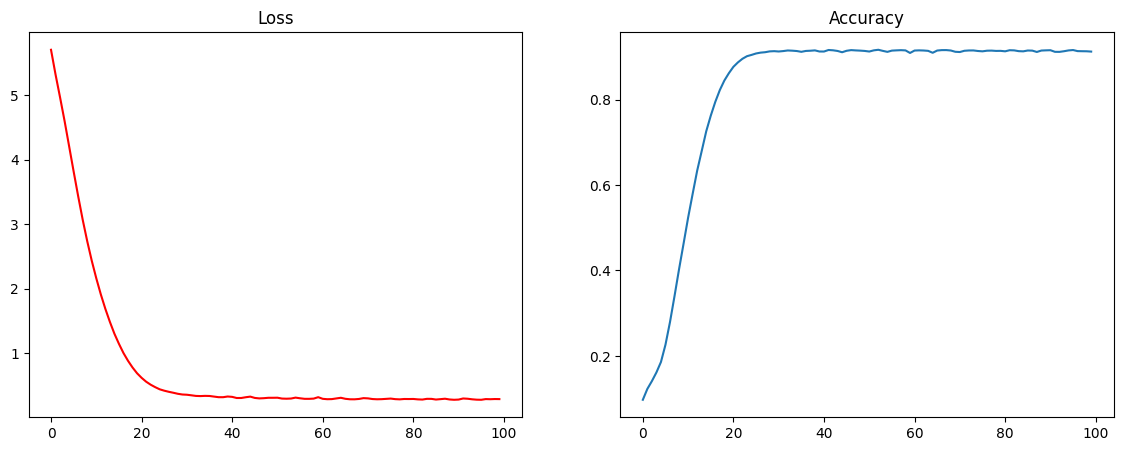

In [33]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(history.history['loss'] , 'r')
plt.title("Loss")
plt.subplot(122)
plt.title("Accuracy")
plt.plot(history.history['accuracy'])


In [36]:
pkl.dump(model,open('next_word_predictor.pkl' , 'wb'))

In [38]:
pkl.dump(tokenizer,open('next_word_tokenizer.pkl' , 'wb'))